# Timeseries

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [2]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [3]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [5]:
inflindex = pd.PeriodIndex(year = data.year, quarter=data.quarter, freq='Q-DEC')
inflindex

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [6]:
data.index = inflindex
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [7]:
data['pop']

1959Q1    177.146
1959Q2    177.830
1959Q3    178.657
1959Q4    179.386
1960Q1    180.007
           ...   
2008Q3    305.270
2008Q4    305.952
2009Q1    306.547
2009Q2    307.226
2009Q3    308.013
Freq: Q-DEC, Name: pop, Length: 203, dtype: float64

<IPython.core.display.Javascript object>


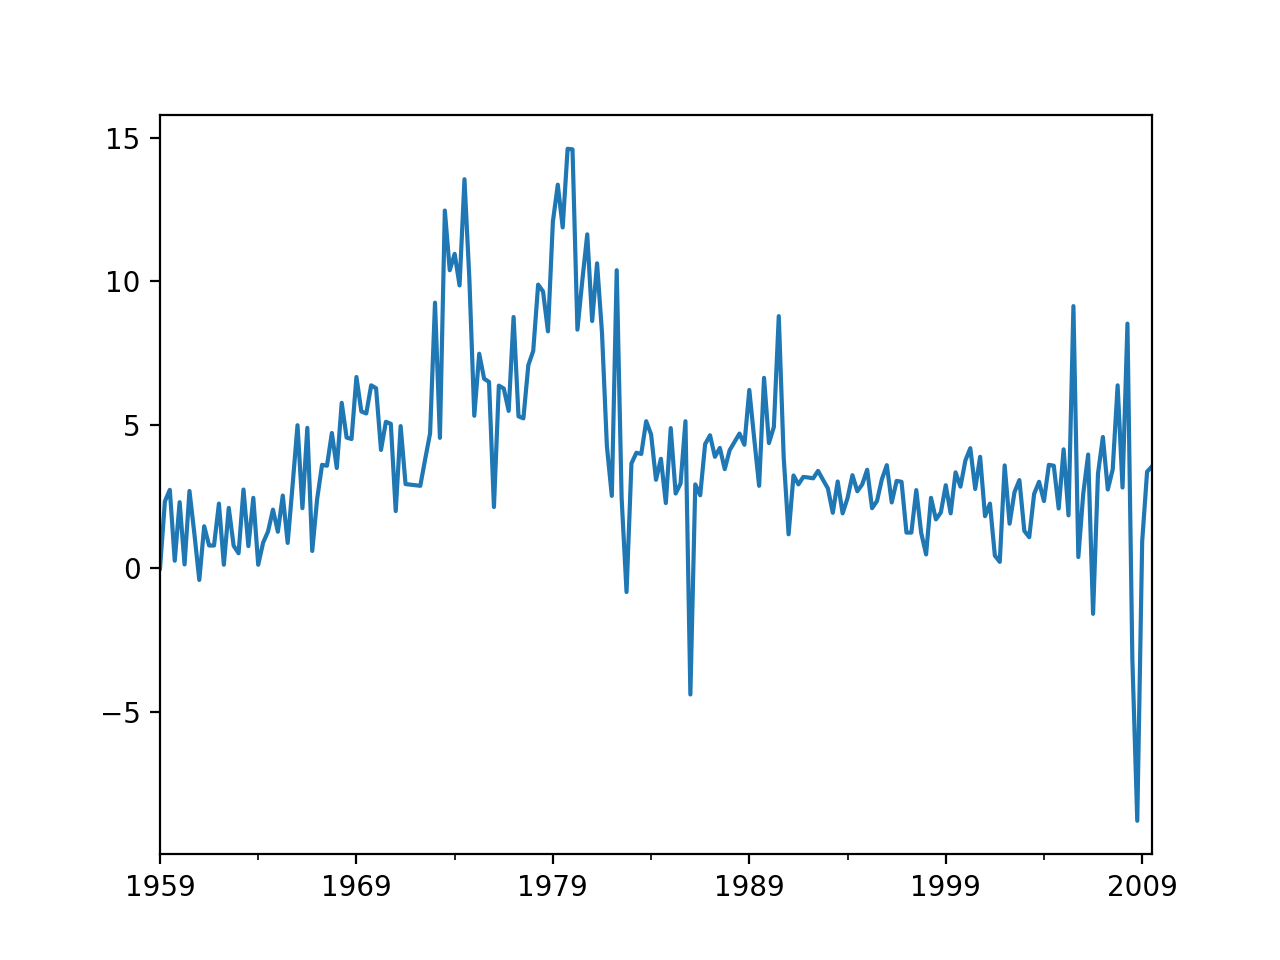

In [8]:
%matplotlib notebook
data.infl.plot()

In [9]:
rng = pd.date_range('2019-09-01', periods=110, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2019-09-01    0.313532
2019-09-02   -0.022779
2019-09-03   -1.431959
2019-09-04   -1.628216
2019-09-05   -0.263348
                ...   
2019-12-15    1.949090
2019-12-16    0.039795
2019-12-17   -0.425080
2019-12-18   -1.332584
2019-12-19   -1.845546
Freq: D, Length: 110, dtype: float64

In [10]:
ts.resample('M').mean()

2019-09-30   -0.413720
2019-10-31   -0.040300
2019-11-30   -0.004320
2019-12-31    0.269151
Freq: M, dtype: float64

In [11]:
ts.resample('M', kind='period').min()

2019-09   -3.115553
2019-10   -2.315550
2019-11   -1.479132
2019-12   -1.845546
Freq: M, dtype: float64

In [12]:
rng = pd.date_range('2019-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2019-01-01 00:00:00     0
2019-01-01 00:01:00     1
2019-01-01 00:02:00     2
2019-01-01 00:03:00     3
2019-01-01 00:04:00     4
2019-01-01 00:05:00     5
2019-01-01 00:06:00     6
2019-01-01 00:07:00     7
2019-01-01 00:08:00     8
2019-01-01 00:09:00     9
2019-01-01 00:10:00    10
2019-01-01 00:11:00    11
Freq: T, dtype: int64

In [13]:
ts.resample('5min').sum()


2019-01-01 00:00:00    10
2019-01-01 00:05:00    35
2019-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [14]:
import os
import json
from FrozenJSON import FrozenJSON
import glob
import pandas as pd


def loads(JSON):
    with open(JSON) as fp:
        return json.load(fp)

def get_data():
    files = [os.path.basename(x) for x in glob.glob("../data/weather/*")]
    data = {}
    for file in files:
        feed = FrozenJSON(loads('../data/weather/'+file))
        temp = float(feed.main.temp) - 273.15
        ctime = file[12:-5]
        data[ctime] = '{: .2f}'.format(temp)
    return data

def format_data(data):
    df = pd.DataFrame.from_dict(data, orient='index')
    df = df.sort_index().reset_index()
    df.columns = ['dt', 'temp']
    df['dt'] = pd.to_datetime(df['dt'])
    df['temp'] = pd.to_numeric(df['temp'])
    return df



data = get_data()
df = format_data(data)
df.head(100)


,dt,temp
0,2019-12-18 21:54:00,4.61
1,2019-12-18 21:59:00,4.61
2,2019-12-18 22:04:00,4.61
3,2019-12-18 22:09:00,4.59
4,2019-12-18 22:14:00,4.59
...,...,...
56,2019-12-19 09:58:00,8.28
57,2019-12-19 10:19:00,8.68
58,2019-12-19 10:20:00,8.68
59,2019-12-19 10:22:00,8.68


<IPython.core.display.Javascript object>


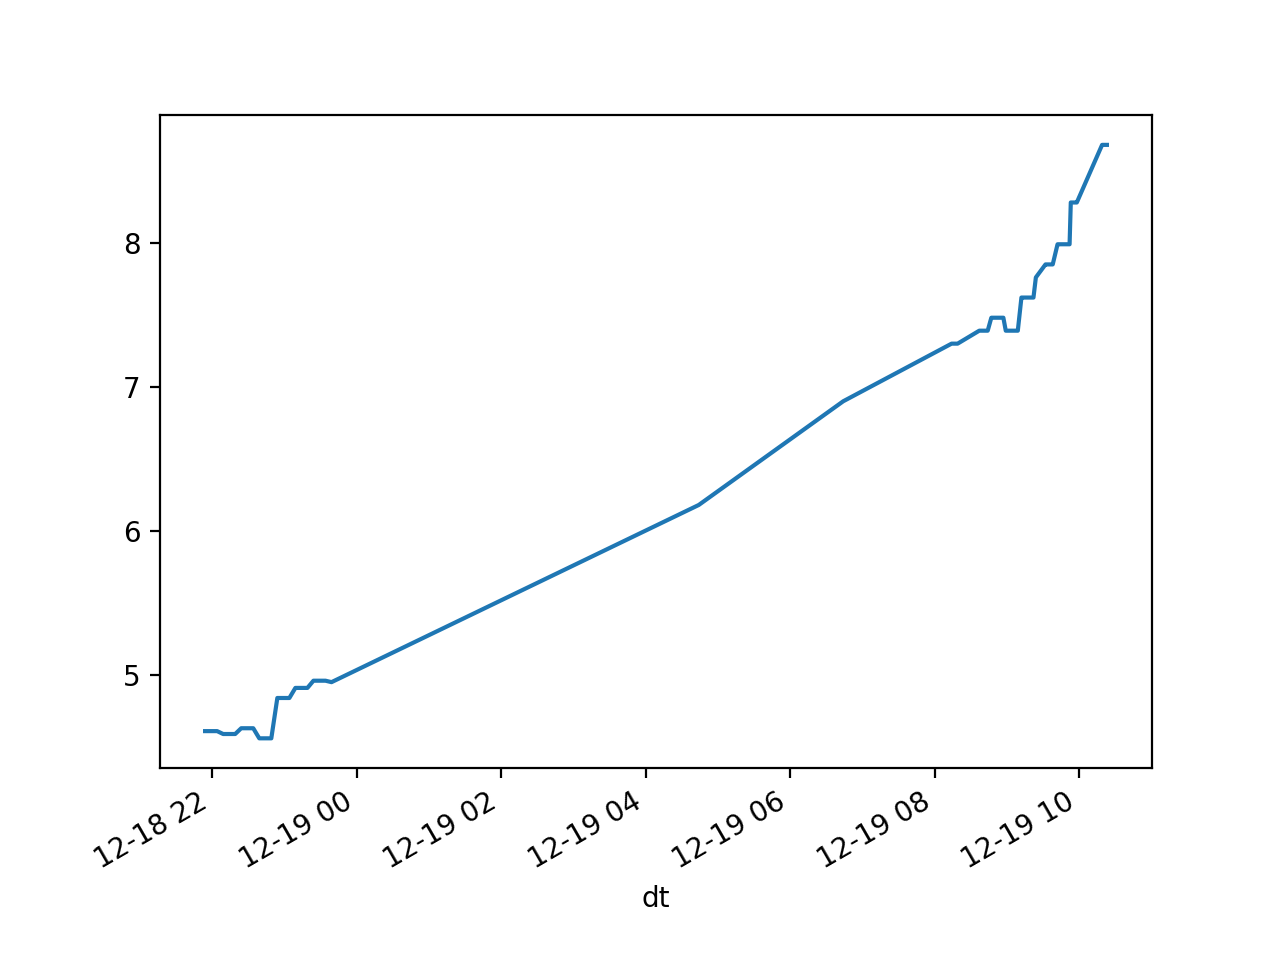

In [15]:
%matplotlib notebook
df.index = df.dt
df.temp.plot()

In [16]:
df = df.resample("T").ffill()

<IPython.core.display.Javascript object>


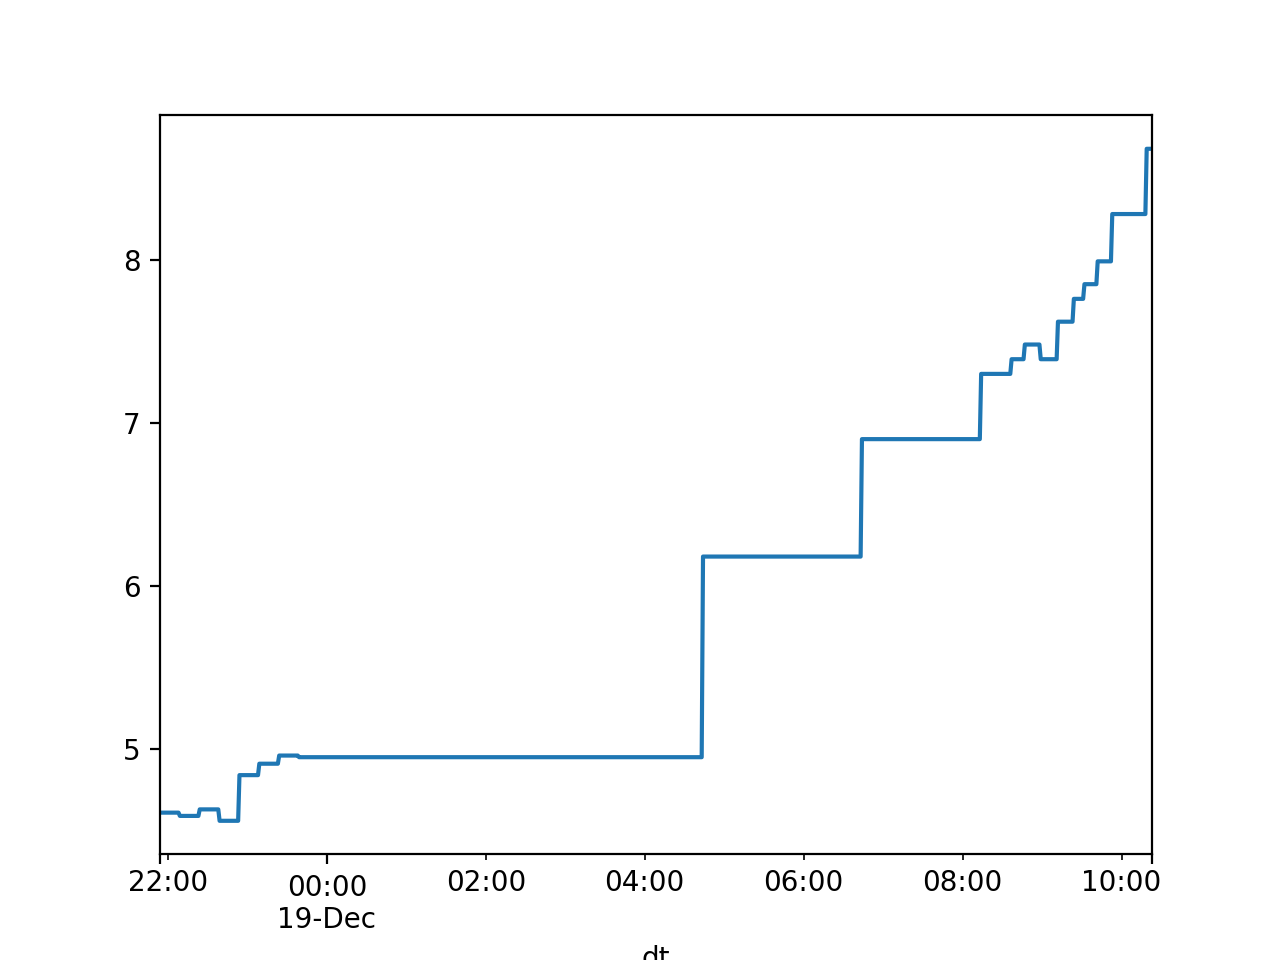

In [17]:
%matplotlib notebook
df.temp.plot()

<IPython.core.display.Javascript object>


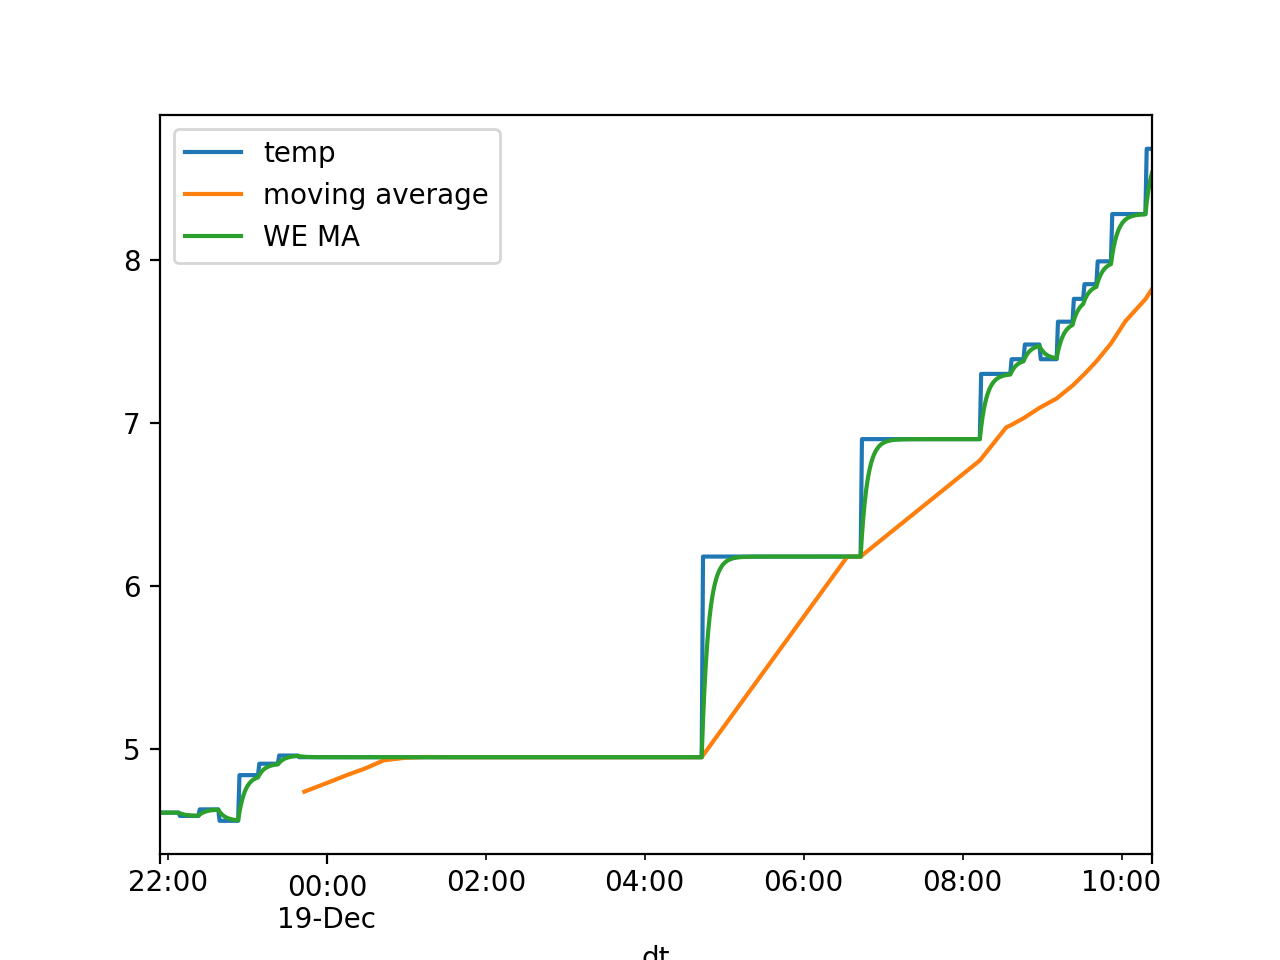

In [18]:
%matplotlib notebook
df.temp.plot()
df.temp.rolling(window = 110).mean().plot(label = 'moving average')
df.temp.ewm(span = 10).mean().plot(label = 'WE MA').legend()

<IPython.core.display.Javascript object>


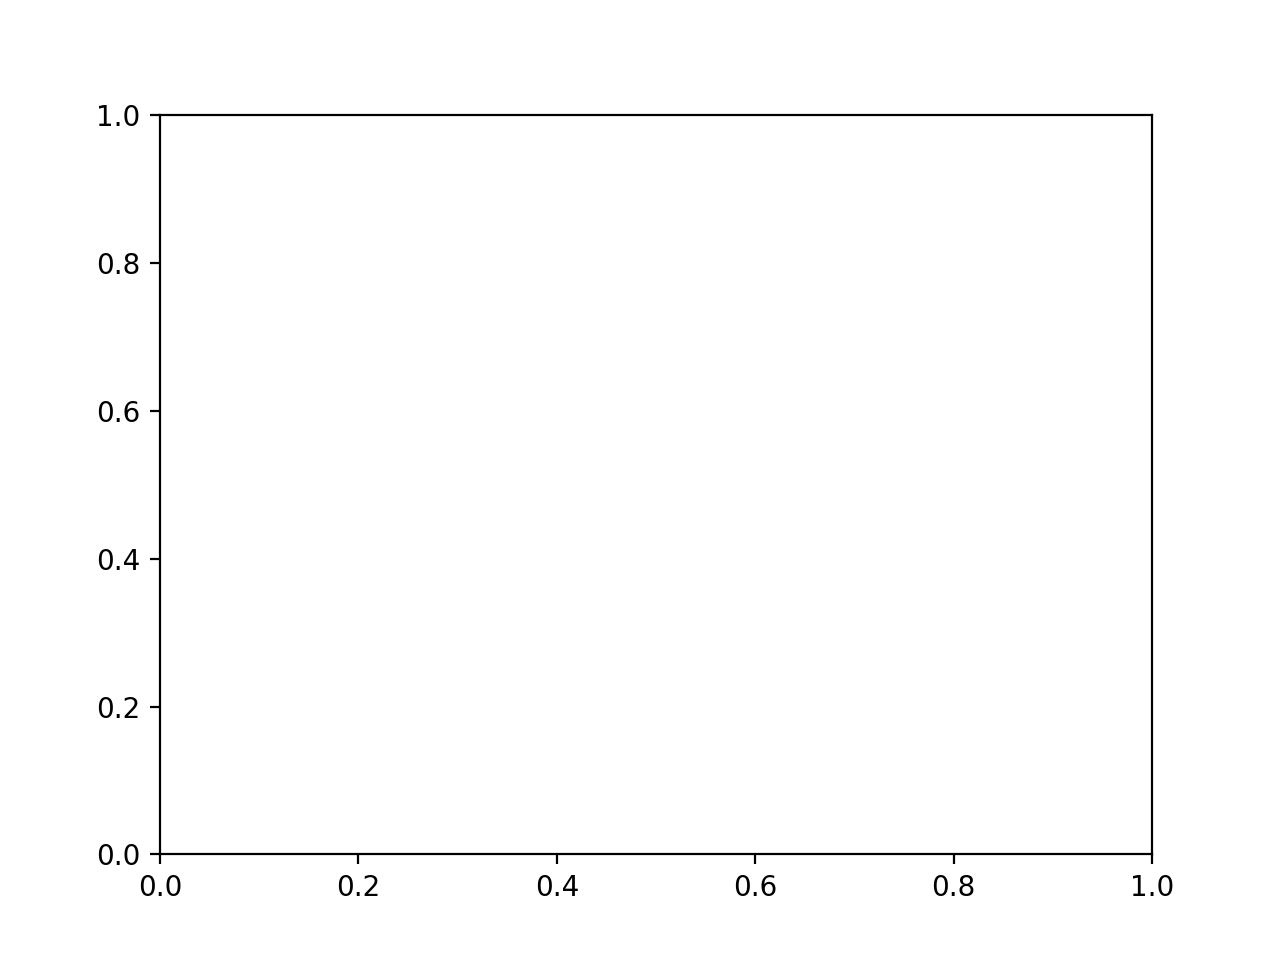

In [19]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation

def update(curr):
    """does the plotting where curr is in the current frame"""
    if curr == n:
        a.event_source.stop() #stop when it is at the end of the interval
    plt.cla()
    axs=[ax1]
    fig.subtitle('sampling weather with t {}'.format(df.dt[curr]))
    axs[0].plot(df.dt[:curr], label='temp', color = 'red')
    axs[0].plot(df.dt[:curr], df.temp.rolling(window = 10).mean()[:curr], label='moving average temp', color = 'blue')
    axs[0].set_ylim([df.temp.min()-3, df.temp.max()+3])
    plt.legend()

n = len(df) -1
fig, ((ax1)) = plt.subplots(1, 1, sharey=True)
a = animation.FuncAnimation(fig, update, interval=60)

    
                     